In [53]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision.transforms as transforms
import importlib
import dataset
import torch
from PIL import Image
importlib.reload(dataset)

<module 'dataset' from '/Users/kjwdamme/Master/DataScience/Project/dataset.py'>

In [65]:
transform = transforms.Compose([
    # to-tensor
    transforms.ToTensor(),
    # resize
    transforms.Resize(128),
    # center-crop
    transforms.CenterCrop(128),
    # normalize
    # transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

In [66]:
incidents = dataset.IncidentsDataset("Incidents-subset", transform=transform)

test


In [124]:
nSamples = incidents.data.shape[0]
nClasses = len(incidents.labels)
imgShape = incidents.data[0].shape

print("Number of samples: ", nSamples)
print("Number of classes: ", nClasses)
print("Shape of an image: ", imgShape)

Number of samples:  6927
Number of classes:  12
Shape of an image:  torch.Size([3, 128, 128])


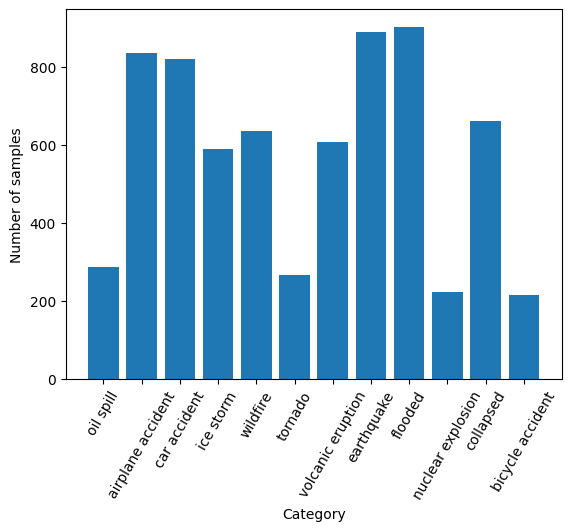

In [125]:
target, counts = np.unique(incidents.targets, return_counts=True)

_, ax = plt.subplots()

ax.bar(incidents.labels[target], counts) #, width=1, edgecolor="white", linewidth=.7)
plt.ylabel("Number of samples")
plt.xlabel("Category")
plt.xticks(rotation=60)
plt.show()

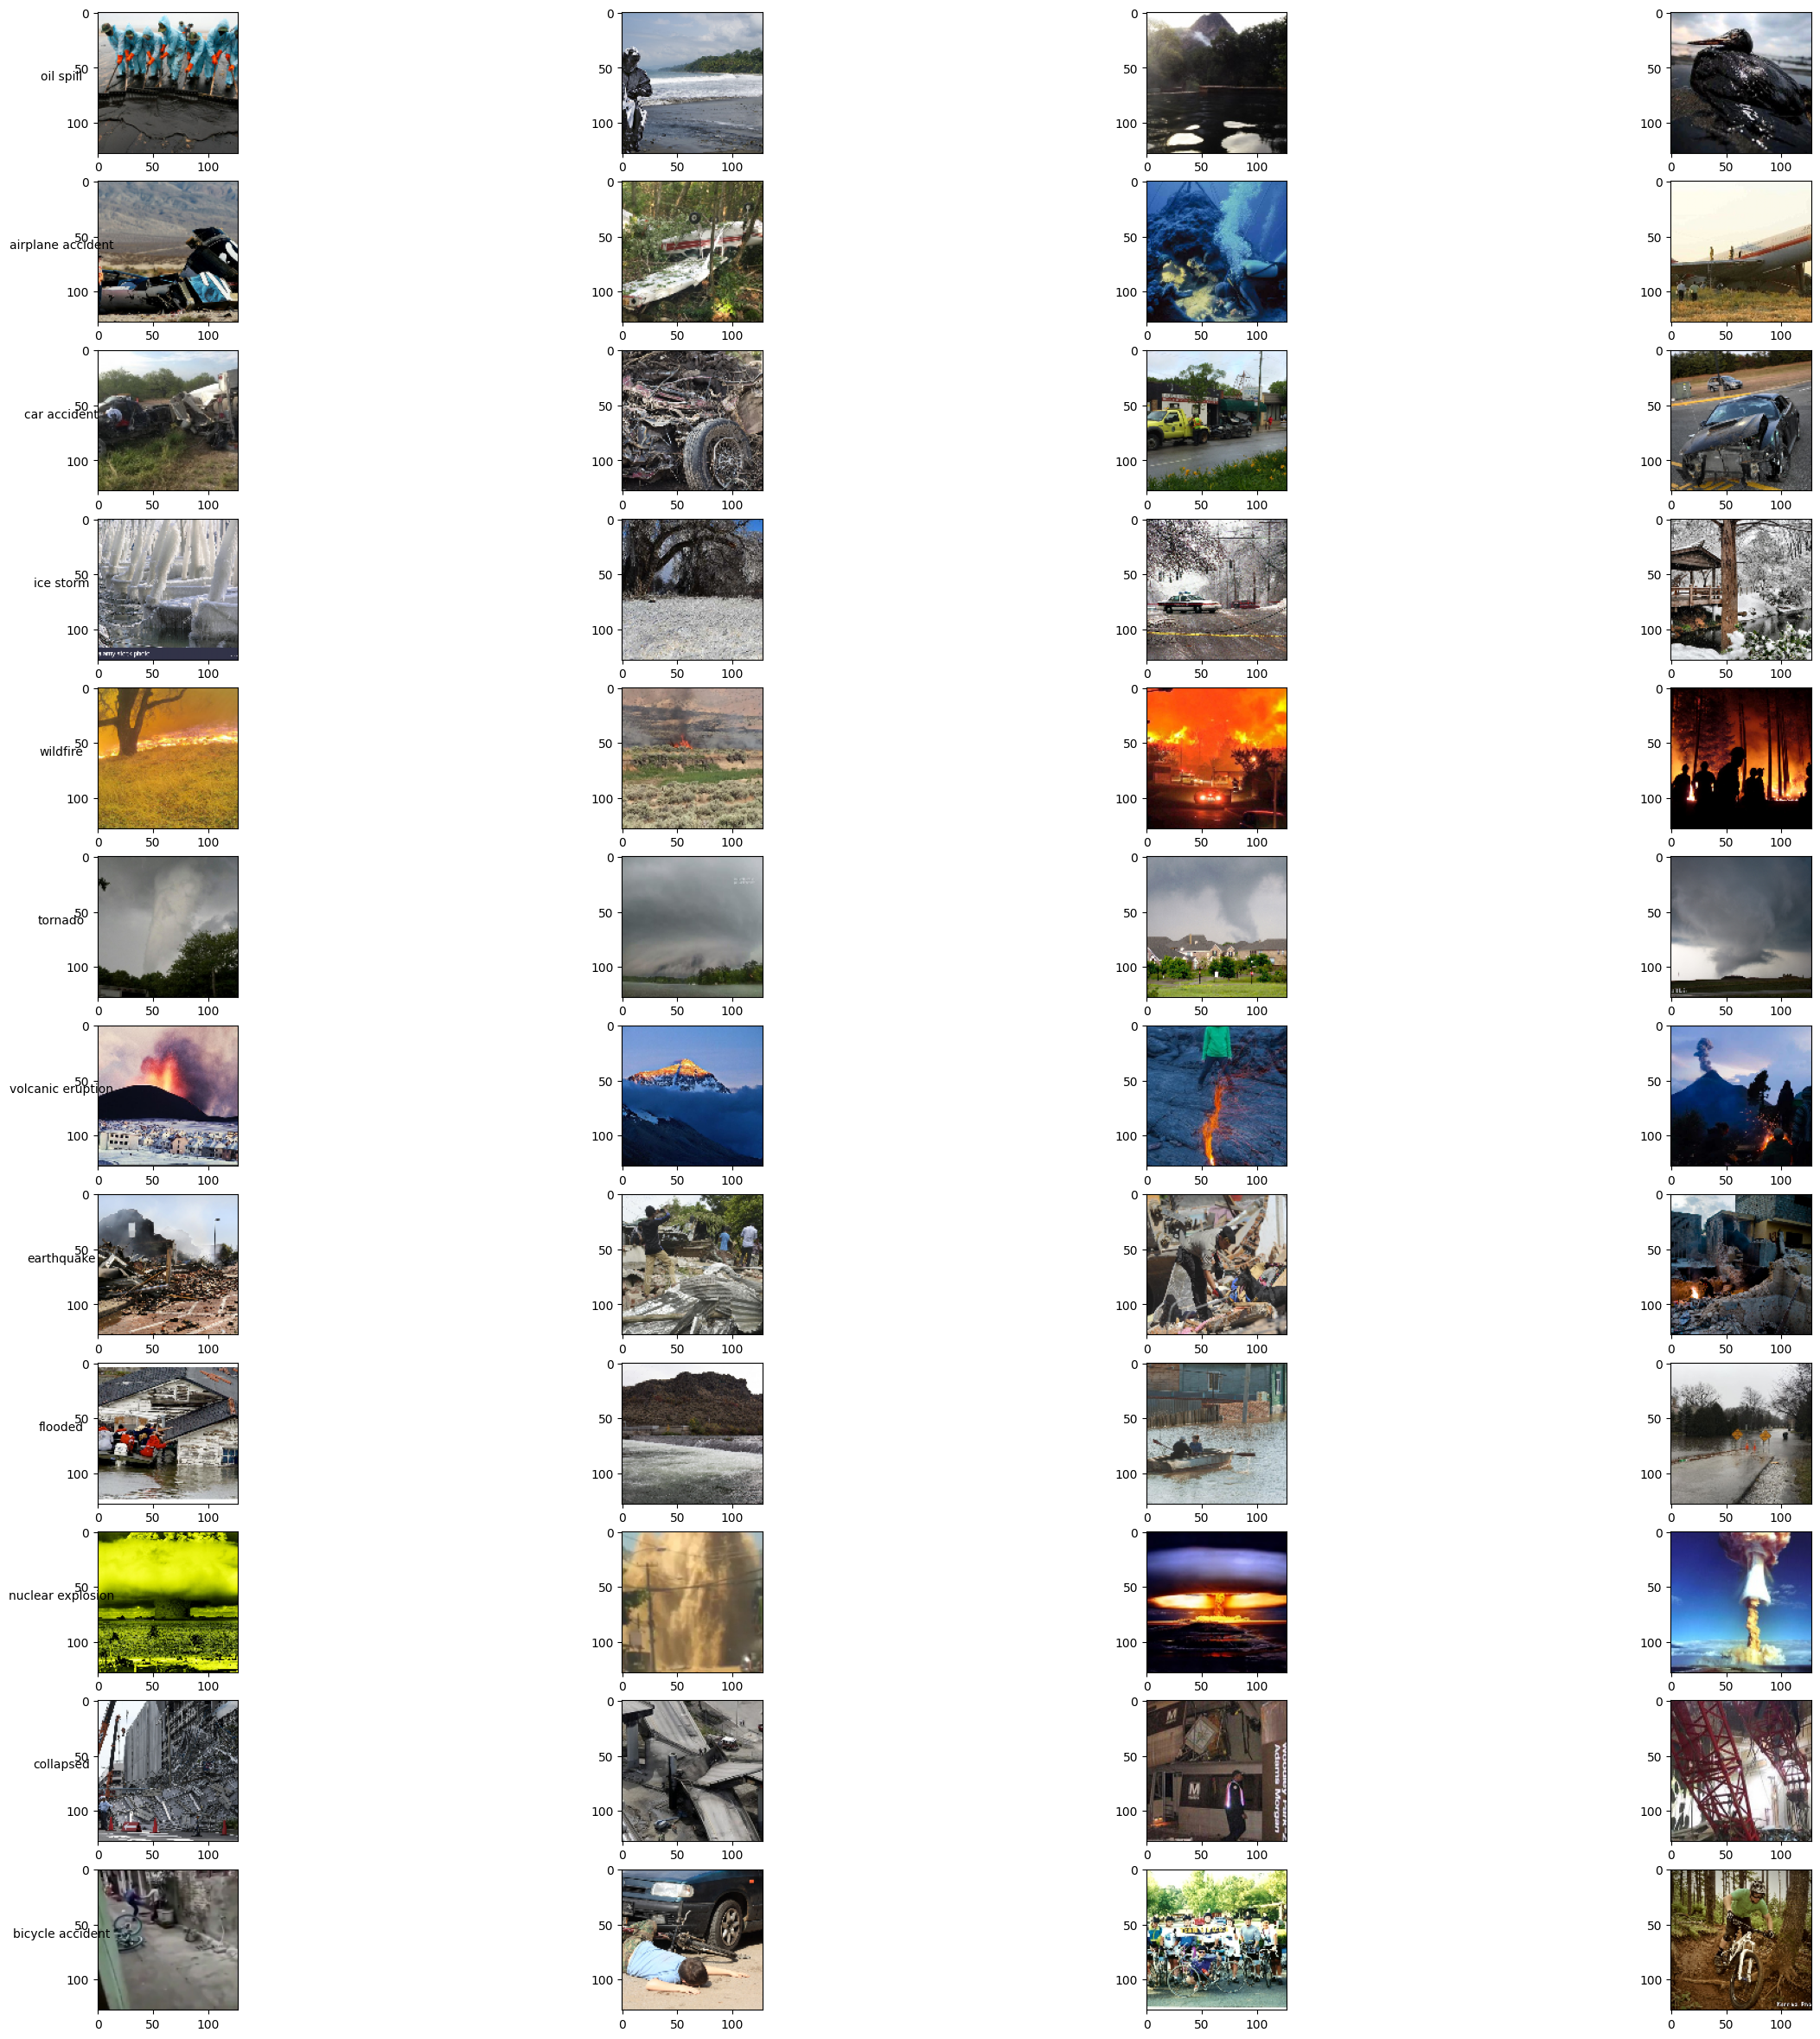

In [141]:
# your code here
_, axs = plt.subplots(nClasses, 4, figsize=(30, 30))

for n in np.arange(nClasses):
    for i in range(4):
        # img = np.transpose(dataset.data[dataset.targets == n][i], (1, 2, 0))
        if i == 0:
            axs[n, i].set_ylabel(incidents.labels[n], rotation=0)
        axs[n, i].imshow(incidents.data[incidents.targets == n][i].permute(1, 2, 0))
        # axs[n, i].axis('off')